In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Kyoto_Gases = pd.read_csv('Kyoto Gases.csv')

In [3]:
#Save Kyoto_Gases data (2020-2100), consider the case of C1-C8 for simplicity.
X_Emissions = Kyoto_Gases
X_Emissions = X_Emissions[X_Emissions['Category'].isin(['C1','C2','C3','C4','C5','C6','C7','C8'])]
X_Emissions.reset_index(drop=True,inplace=True)

In [4]:
#Merge models according to a uniform standard
MESSAGEix = list(set([i for i in X_Emissions['Model'] if  'MESSAGE' in i]))
WITCH = list(set([i for i in X_Emissions['Model'] if  'WITCH' in i]))
COFFEE = ['COFFEE 1.1']
REMIND = list(set([i for i in X_Emissions['Model'] if  'REM' in i]))
TIA = list(set([i for i in X_Emissions['Model'] if  'TIAM-ECN' in i]))
POL = list(set([i for i in X_Emissions['Model'] if  'POL' in i]))
AIM = list(set([i for i in X_Emissions['Model'] if  'AIM' in i]))
IMA = list(set([i for i in X_Emissions['Model'] if  'IMAGE' in i]))
GCA = list(set([i for i in X_Emissions['Model'] if  'GCA' in i]))

In [5]:
Model = [MESSAGEix,WITCH,COFFEE,REMIND,TIA,POL,AIM,IMA,GCA]
Model_names = ['MESSAGEix','WITCH','COFFEE','REMIND','TIA','POL','AIM','IMA','GCA']
Model_List = []
for i in Model:
    Model_List += i
X_Emissions = X_Emissions[X_Emissions['Model'].isin(Model_List)]
mapping = {j:Model_names[i] for i in range(len(Model)) for j in Model[i]}
X_Emissions['Model'].replace(mapping,inplace=True)
X_Emissions.reset_index(drop=True,inplace=True)

In [6]:
#Load a dataset of individual variables
CarbonSequestration = pd.read_csv('Carbon_Sequestration_CCS_imputed.csv')
FinalEnergy_Liquid = pd.read_csv('Final Energy_Liquids.csv')
PrimaryEnergy_Gas = pd.read_csv('Primary Energy_Gas.csv')
PrimaryEnergy_Oil = pd.read_csv('Primary Energy_Oil.csv')
PrimaryEnergy_Coal = pd.read_csv('PrimaryEnergy_Coal.csv')
Model_Scenario = X_Emissions[['Model','Scenario']]
Variables = [CarbonSequestration,FinalEnergy_Liquid,PrimaryEnergy_Coal,PrimaryEnergy_Gas,PrimaryEnergy_Oil]
for i in range(len(Variables)):
    Variables[i]['Model'].replace(mapping,inplace=True)
for variable in Variables:
    Model_Scenario = pd.merge(Model_Scenario,variable[['Model','Scenario']],on=['Model','Scenario'],how='inner')

In [7]:
#Take out the CarbonSequestration value at 2050
CarbonSequestration_2050 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Model','2050']]

In [8]:
#Take out the CarbonSequestration value of each model at 2050
MES_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'MESSAGEix']['2050'].values
WIT_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'WITCH']['2050'].values
COF_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'COFFEE']['2050'].values
REM_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'REMIND']['2050'].values
TIA_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'TIA']['2050'].values
POL_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'POL']['2050'].values
AIM_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'AIM']['2050'].values
IMA_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'IMA']['2050'].values
GCA_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Model']== 'GCA']['2050'].values
Data_Values = [MES_CarbonSequestration_2050,WIT_CarbonSequestration_2050,COF_CarbonSequestration_2050,REM_CarbonSequestration_2050,TIA_CarbonSequestration_2050,POL_CarbonSequestration_2050,AIM_CarbonSequestration_2050,IMA_CarbonSequestration_2050,GCA_CarbonSequestration_2050]

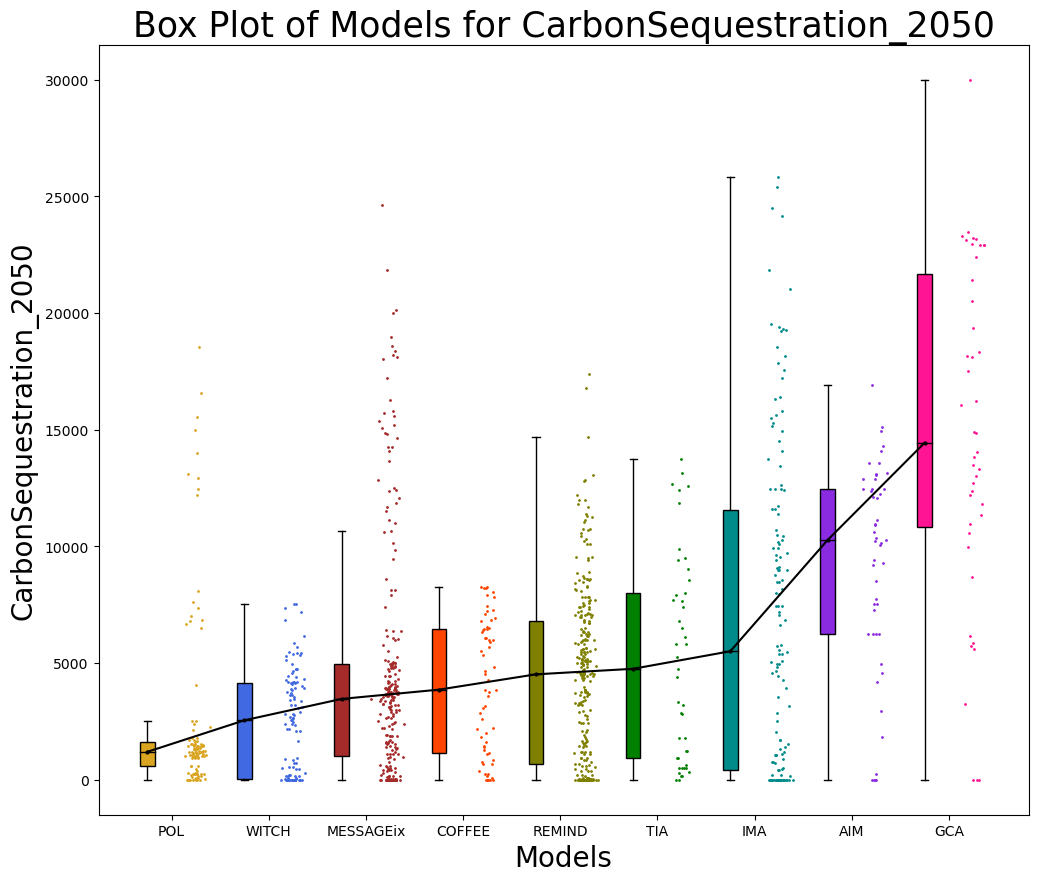

In [9]:
import seaborn as sns
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median value
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# Draw a scatter chart
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('CarbonSequestration_2050',fontsize=20)
plt.title('Box Plot of Models for CarbonSequestration_2050',fontsize=25)
# Set scale
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for CarbonSequestration_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [10]:
#Take out the CarbonSequestration value of each model at 2100
CarbonSequestration_2100 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Model','2100']]
MES_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'MESSAGEix']['2100'].values
WIT_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'WITCH']['2100'].values
COF_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'COFFEE']['2100'].values
REM_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'REMIND']['2100'].values
TIA_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'TIA']['2100'].values
POL_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'POL']['2100'].values
AIM_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'AIM']['2100'].values
IMA_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'IMA']['2100'].values
GCA_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Model']== 'GCA']['2100'].values
Data_Values = [MES_CarbonSequestration_2100,WIT_CarbonSequestration_2100,COF_CarbonSequestration_2100,REM_CarbonSequestration_2100,TIA_CarbonSequestration_2100,POL_CarbonSequestration_2100,AIM_CarbonSequestration_2100,IMA_CarbonSequestration_2100,GCA_CarbonSequestration_2100]

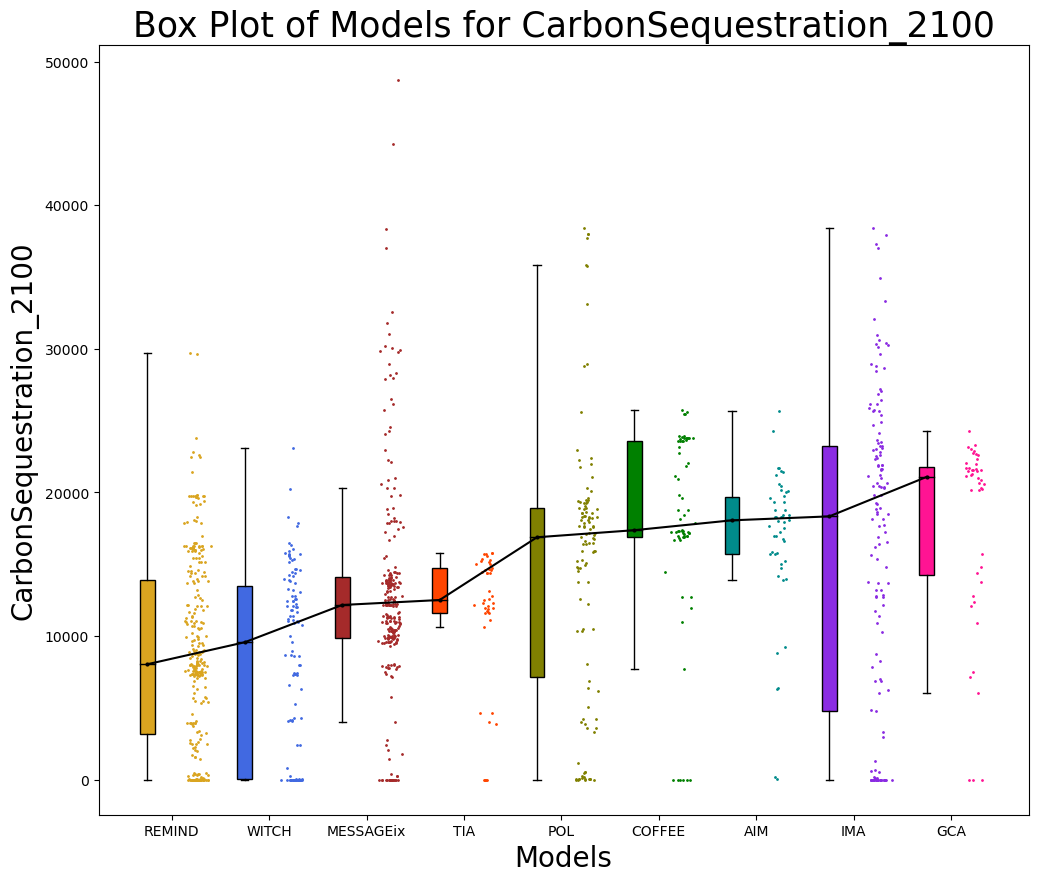

In [11]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median value
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('CarbonSequestration_2100',fontsize=20)
plt.title('Box Plot of Models for CarbonSequestration_2100',fontsize=25)
# Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for CarbonSequestration_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [12]:
#Take the FinalEnergy_Liquid values of each model at 2050
FinalEnergy_Liquid_2050 = pd.merge(Model_Scenario,Variables[1],on=['Model','Scenario'],how='inner')[['Model','2050']]
MES_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'MESSAGEix']['2050'].values
WIT_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'WITCH']['2050'].values
COF_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'COFFEE']['2050'].values
REM_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'REMIND']['2050'].values
TIA_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'TIA']['2050'].values
POL_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'POL']['2050'].values
AIM_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'AIM']['2050'].values
IMA_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'IMA']['2050'].values
GCA_FinalEnergy_Liquid_2050 = FinalEnergy_Liquid_2050[FinalEnergy_Liquid_2050['Model']== 'GCA']['2050'].values
Data_Values = [MES_FinalEnergy_Liquid_2050,WIT_FinalEnergy_Liquid_2050,COF_FinalEnergy_Liquid_2050,REM_FinalEnergy_Liquid_2050,TIA_FinalEnergy_Liquid_2050,POL_FinalEnergy_Liquid_2050,AIM_FinalEnergy_Liquid_2050,IMA_FinalEnergy_Liquid_2050,GCA_FinalEnergy_Liquid_2050]

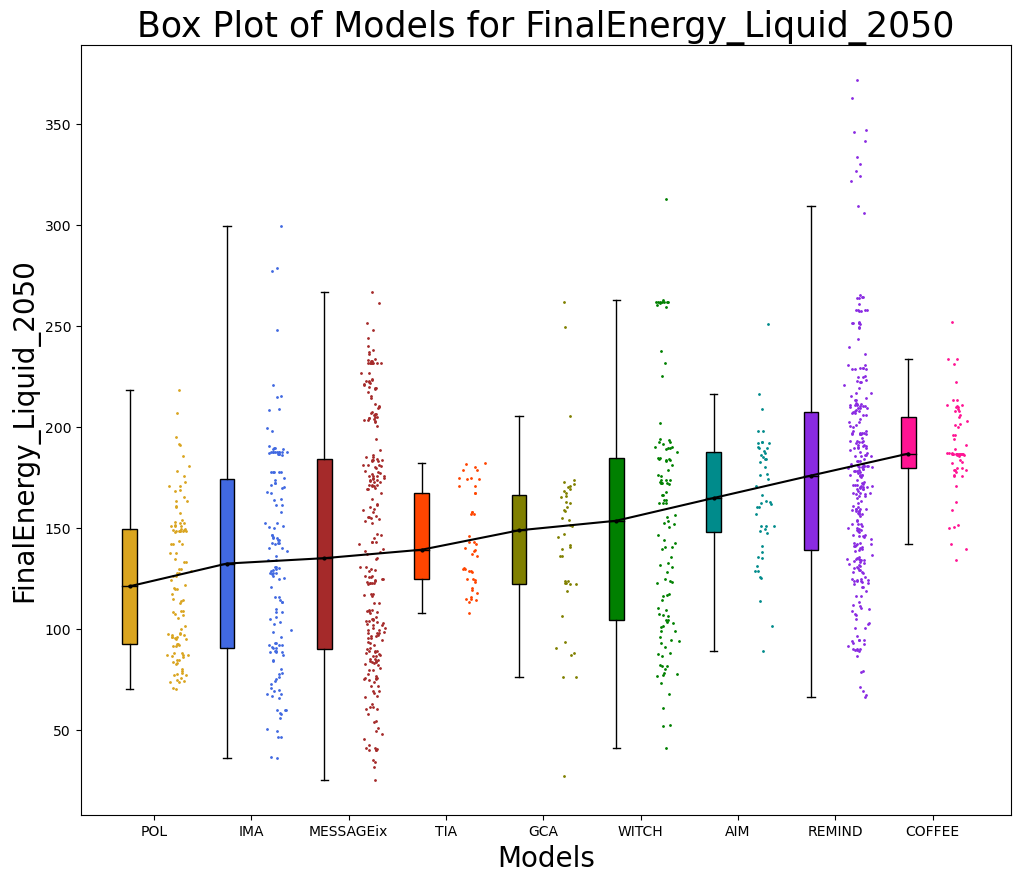

In [13]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median value
sorted_indices = np.argsort(medians) #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('FinalEnergy_Liquid_2050',fontsize=20)
plt.title('Box Plot of Models for FinalEnergy_Liquid_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for FinalEnergy_Liquid_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [14]:
#Get the FinalEnergy_Liquid values of each model at 2100
FinalEnergy_Liquid_2100 = pd.merge(Model_Scenario,Variables[1],on=['Model','Scenario'],how='inner')[['Model','2100']]
MES_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'MESSAGEix']['2100'].values
WIT_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'WITCH']['2100'].values
COF_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'COFFEE']['2100'].values
REM_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'REMIND']['2100'].values
TIA_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'TIA']['2100'].values
POL_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'POL']['2100'].values
AIM_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'AIM']['2100'].values
IMA_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'IMA']['2100'].values
GCA_FinalEnergy_Liquid_2100 = FinalEnergy_Liquid_2100[FinalEnergy_Liquid_2100['Model']== 'GCA']['2100'].values
Data_Values = [MES_FinalEnergy_Liquid_2100,WIT_FinalEnergy_Liquid_2100,COF_FinalEnergy_Liquid_2100,REM_FinalEnergy_Liquid_2100,TIA_FinalEnergy_Liquid_2100,POL_FinalEnergy_Liquid_2100,AIM_FinalEnergy_Liquid_2100,IMA_FinalEnergy_Liquid_2100,GCA_FinalEnergy_Liquid_2100]

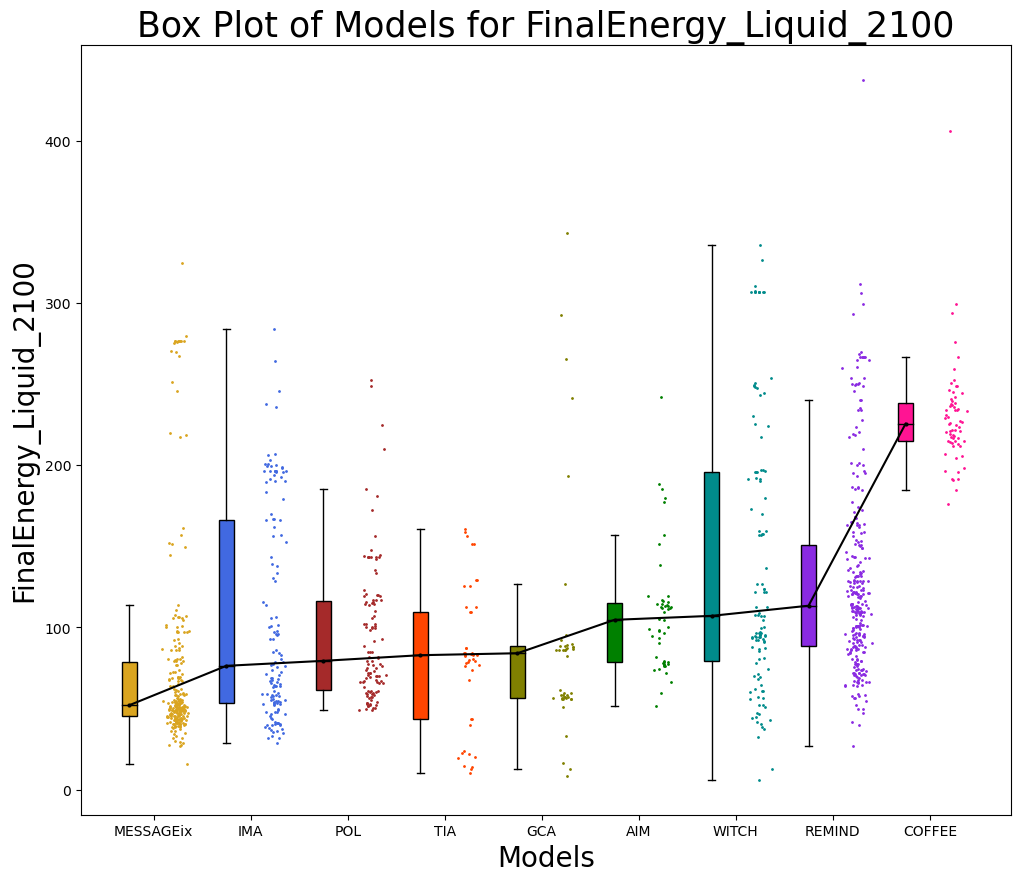

In [15]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median size
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('FinalEnergy_Liquid_2100',fontsize=20)
plt.title('Box Plot of Models for FinalEnergy_Liquid_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for FinalEnergy_Liquid_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [16]:
#Take the PrimaryEnergy_Coal values of each model at 2050
PrimaryEnergy_Coal_2050 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Model','2050']]
MES_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'MESSAGEix']['2050'].values
WIT_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'WITCH']['2050'].values
COF_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'COFFEE']['2050'].values
REM_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'REMIND']['2050'].values
TIA_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'TIA']['2050'].values
POL_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'POL']['2050'].values
AIM_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'AIM']['2050'].values
IMA_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'IMA']['2050'].values
GCA_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Model']== 'GCA']['2050'].values
Data_Values = [MES_PrimaryEnergy_Coal_2050,WIT_PrimaryEnergy_Coal_2050,COF_PrimaryEnergy_Coal_2050,REM_PrimaryEnergy_Coal_2050,TIA_PrimaryEnergy_Coal_2050,POL_PrimaryEnergy_Coal_2050,AIM_PrimaryEnergy_Coal_2050,IMA_PrimaryEnergy_Coal_2050,GCA_PrimaryEnergy_Coal_2050]

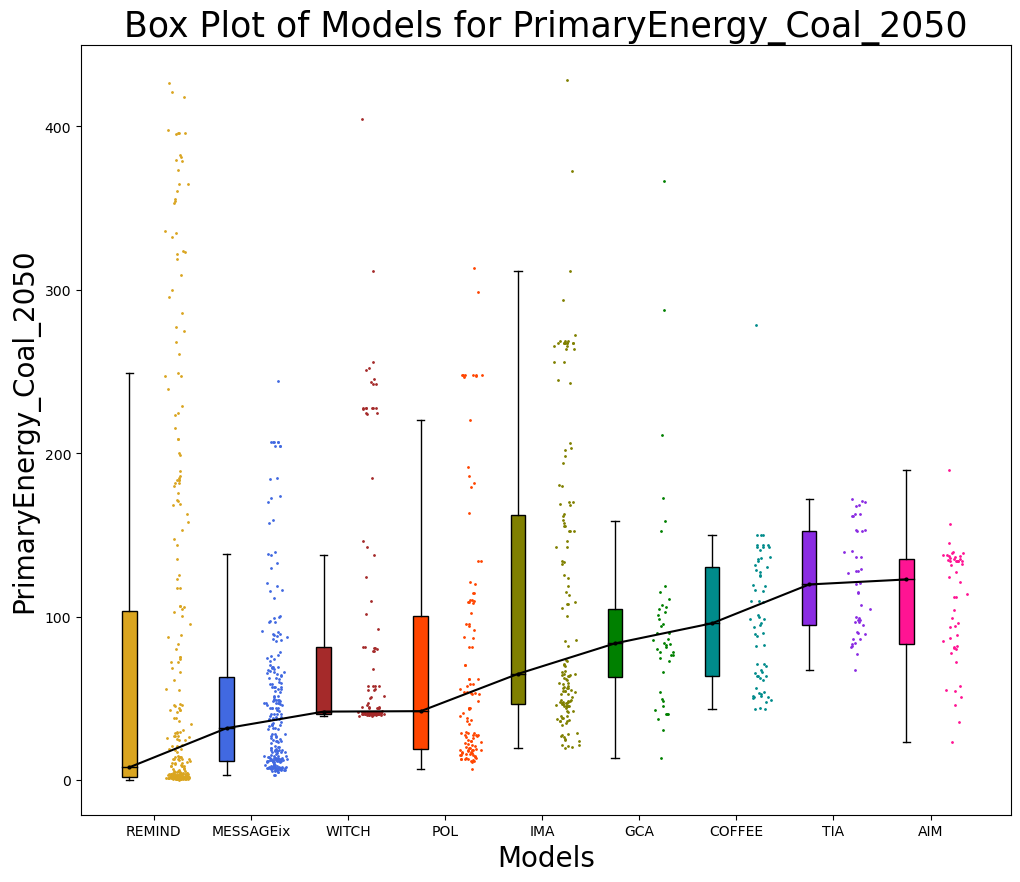

In [17]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median value
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2050',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Coal_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Coal_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [18]:
#Get the PrimaryEnergy_Coal values of each model at 2100
PrimaryEnergy_Coal_2100 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Model','2100']]
MES_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'MESSAGEix']['2100'].values
WIT_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'WITCH']['2100'].values
COF_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'COFFEE']['2100'].values
REM_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'REMIND']['2100'].values
TIA_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'TIA']['2100'].values
POL_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'POL']['2100'].values
AIM_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'AIM']['2100'].values
IMA_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'IMA']['2100'].values
GCA_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Model']== 'GCA']['2100'].values
Data_Values = [MES_PrimaryEnergy_Coal_2100,WIT_PrimaryEnergy_Coal_2100,COF_PrimaryEnergy_Coal_2100,REM_PrimaryEnergy_Coal_2100,TIA_PrimaryEnergy_Coal_2100,POL_PrimaryEnergy_Coal_2100,AIM_PrimaryEnergy_Coal_2100,IMA_PrimaryEnergy_Coal_2100,GCA_PrimaryEnergy_Coal_2100]

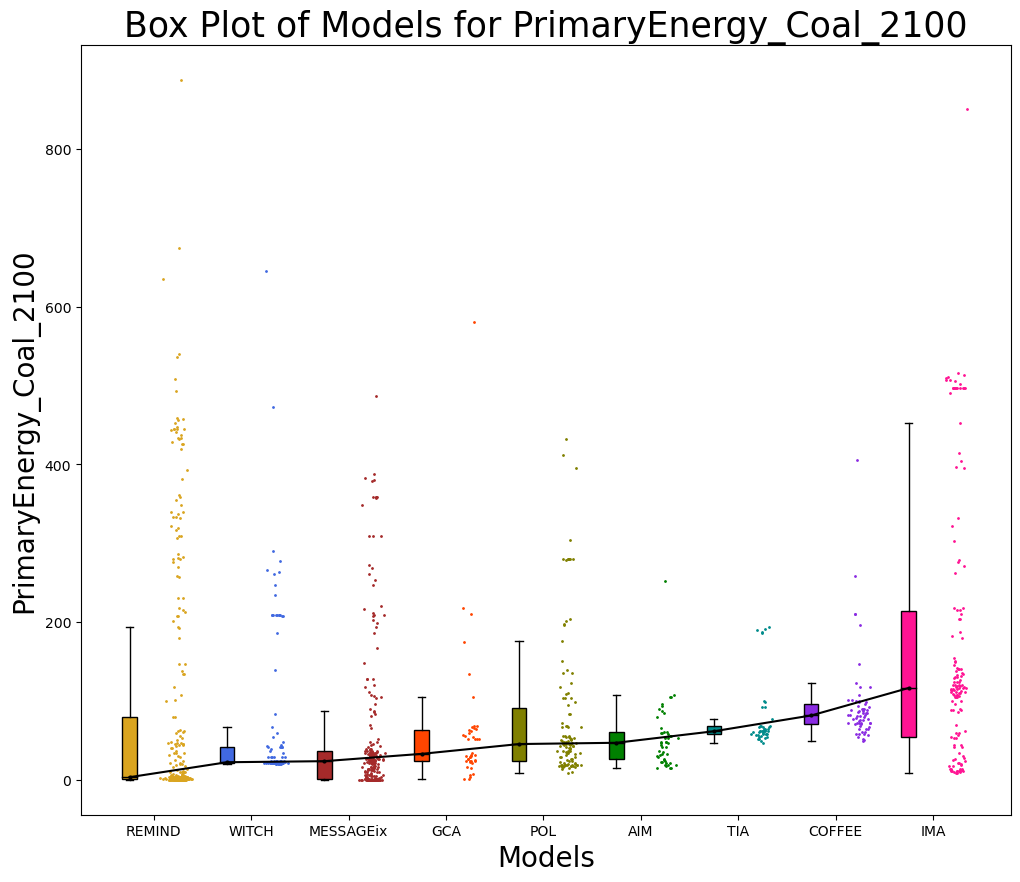

In [19]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2100',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Coal_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Coal_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [20]:
#Take the PrimaryEnergy_Oil values of each model at 2050
PrimaryEnergy_Oil_2050 = pd.merge(Model_Scenario,Variables[4],on=['Model','Scenario'],how='inner')[['Model','2050']]
MES_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'MESSAGEix']['2050'].values
WIT_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'WITCH']['2050'].values
COF_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'COFFEE']['2050'].values
REM_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'REMIND']['2050'].values
TIA_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'TIA']['2050'].values
POL_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'POL']['2050'].values
AIM_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'AIM']['2050'].values
IMA_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'IMA']['2050'].values
GCA_PrimaryEnergy_Oil_2050 = PrimaryEnergy_Oil_2050[PrimaryEnergy_Oil_2050['Model']== 'GCA']['2050'].values
Data_Values = [MES_PrimaryEnergy_Oil_2050,WIT_PrimaryEnergy_Oil_2050,COF_PrimaryEnergy_Oil_2050,REM_PrimaryEnergy_Oil_2050,TIA_PrimaryEnergy_Oil_2050,POL_PrimaryEnergy_Oil_2050,AIM_PrimaryEnergy_Oil_2050,IMA_PrimaryEnergy_Oil_2050,GCA_PrimaryEnergy_Oil_2050]

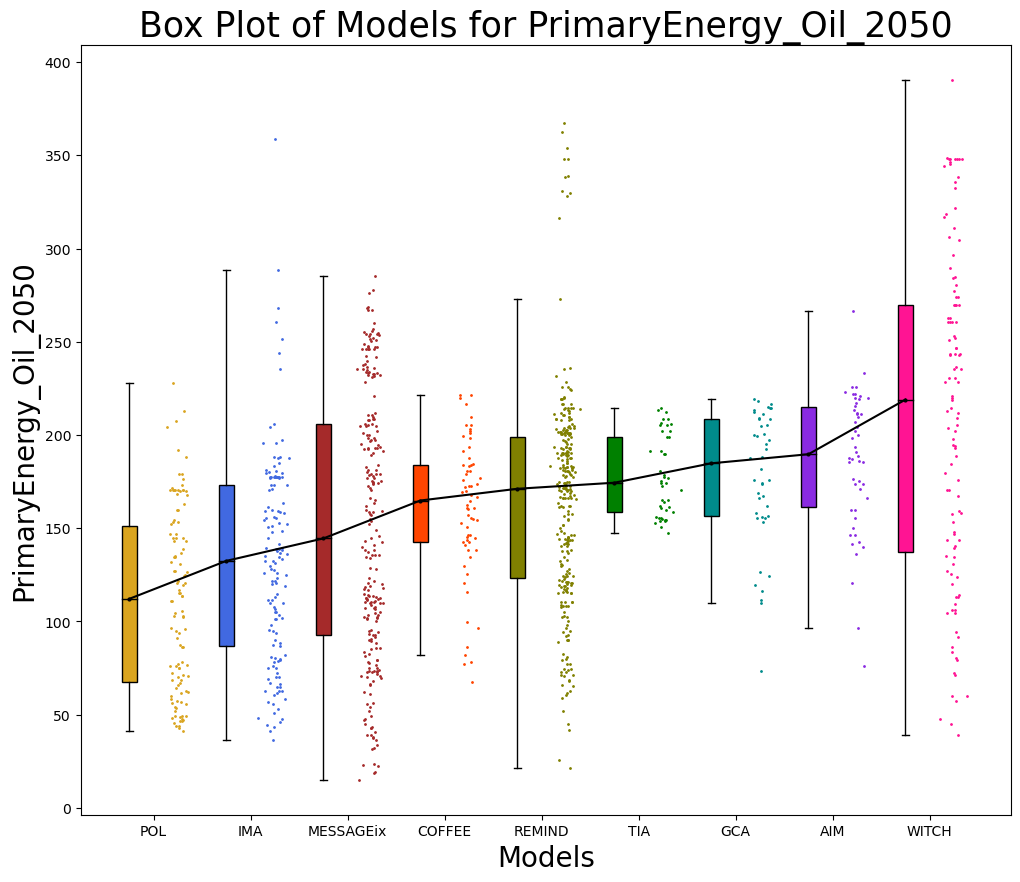

In [21]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median 
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Oil_2050',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Oil_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Oil_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [22]:
#Get the PrimaryEnergy_Oil values of each model at 2100
PrimaryEnergy_Oil_2100 = pd.merge(Model_Scenario,Variables[4],on=['Model','Scenario'],how='inner')[['Model','2100']]
MES_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'MESSAGEix']['2100'].values
WIT_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'WITCH']['2100'].values
COF_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'COFFEE']['2100'].values
REM_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'REMIND']['2100'].values
TIA_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'TIA']['2100'].values
POL_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'POL']['2100'].values
AIM_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'AIM']['2100'].values
IMA_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'IMA']['2100'].values
GCA_PrimaryEnergy_Oil_2100 = PrimaryEnergy_Oil_2100[PrimaryEnergy_Oil_2100['Model']== 'GCA']['2100'].values
Data_Values = [MES_PrimaryEnergy_Oil_2100,WIT_PrimaryEnergy_Oil_2100,COF_PrimaryEnergy_Oil_2100,REM_PrimaryEnergy_Oil_2100,TIA_PrimaryEnergy_Oil_2100,POL_PrimaryEnergy_Oil_2100,AIM_PrimaryEnergy_Oil_2100,IMA_PrimaryEnergy_Oil_2100,GCA_PrimaryEnergy_Oil_2100]

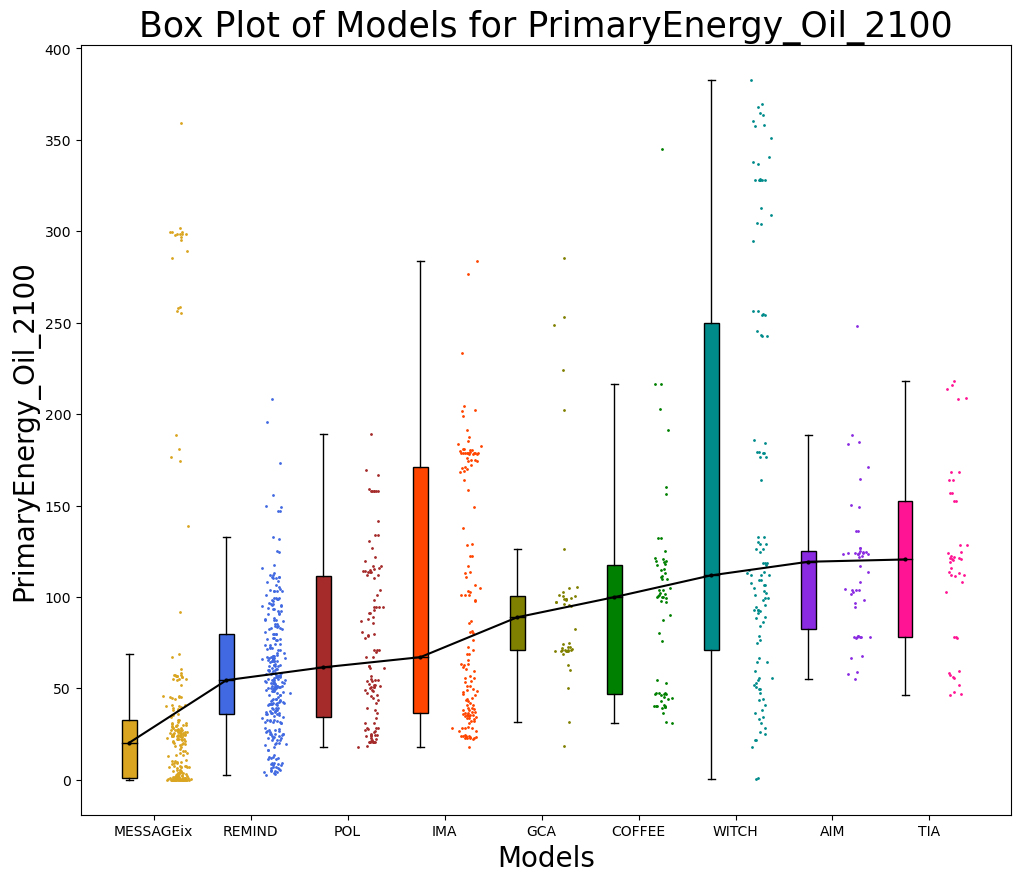

In [23]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median 
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)

plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Oil_2100',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Oil_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Oil_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [24]:
#Take the PrimaryEnergy_Gas values of each model at 2050
PrimaryEnergy_Gas_2050 = pd.merge(Model_Scenario,Variables[3],on=['Model','Scenario'],how='inner')[['Model','2050']]
MES_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'MESSAGEix']['2050'].values
WIT_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'WITCH']['2050'].values
COF_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'COFFEE']['2050'].values
REM_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'REMIND']['2050'].values
TIA_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'TIA']['2050'].values
POL_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'POL']['2050'].values
AIM_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'AIM']['2050'].values
IMA_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'IMA']['2050'].values
GCA_PrimaryEnergy_Gas_2050 = PrimaryEnergy_Gas_2050[PrimaryEnergy_Gas_2050['Model']== 'GCA']['2050'].values
Data_Values = [MES_PrimaryEnergy_Gas_2050,WIT_PrimaryEnergy_Gas_2050,COF_PrimaryEnergy_Gas_2050,REM_PrimaryEnergy_Gas_2050,TIA_PrimaryEnergy_Gas_2050,POL_PrimaryEnergy_Gas_2050,AIM_PrimaryEnergy_Gas_2050,IMA_PrimaryEnergy_Gas_2050,GCA_PrimaryEnergy_Gas_2050]

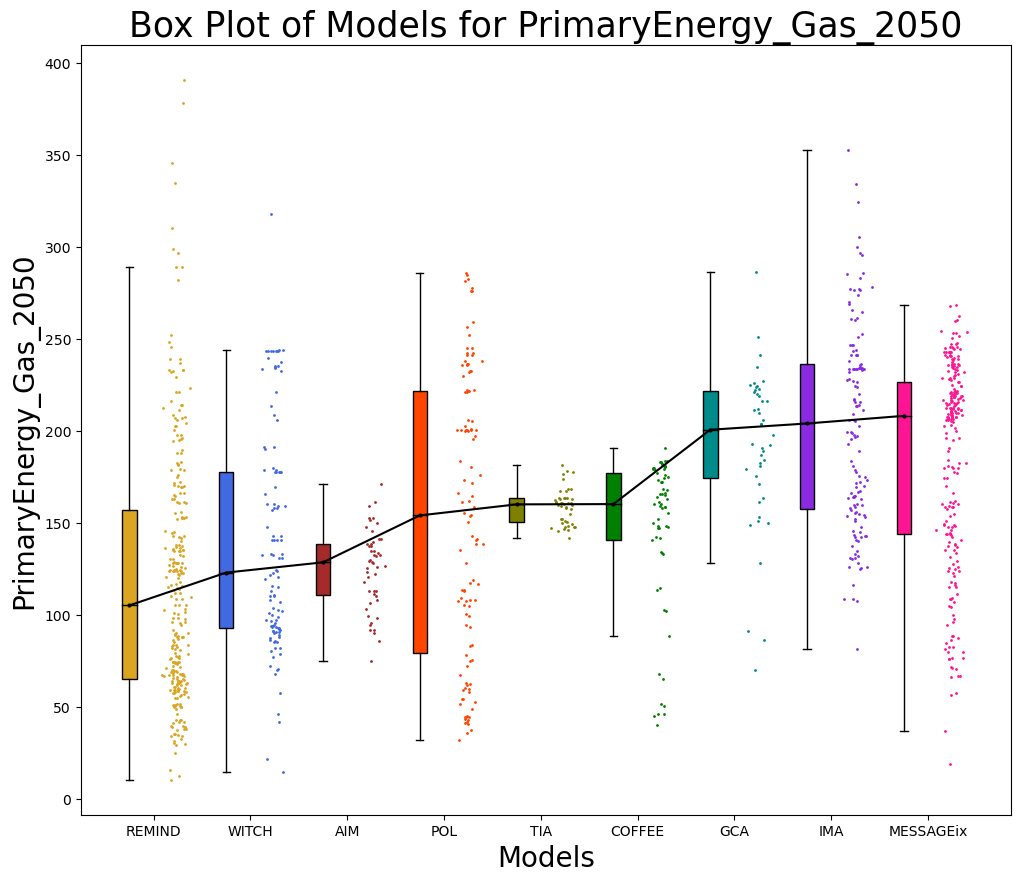

In [25]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median 
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]
colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Gas_2050',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Gas_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Gas_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [26]:
#Get the PrimaryEnergy_Gas values of each model at 2100
PrimaryEnergy_Gas_2100 = pd.merge(Model_Scenario,Variables[3],on=['Model','Scenario'],how='inner')[['Model','2100']]
MES_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'MESSAGEix']['2100'].values
WIT_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'WITCH']['2100'].values
COF_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'COFFEE']['2100'].values
REM_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'REMIND']['2100'].values
TIA_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'TIA']['2100'].values
POL_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'POL']['2100'].values
AIM_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'AIM']['2100'].values
IMA_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'IMA']['2100'].values
GCA_PrimaryEnergy_Gas_2100 = PrimaryEnergy_Gas_2100[PrimaryEnergy_Gas_2100['Model']== 'GCA']['2100'].values
Data_Values = [MES_PrimaryEnergy_Gas_2100,WIT_PrimaryEnergy_Gas_2100,COF_PrimaryEnergy_Gas_2100,REM_PrimaryEnergy_Gas_2100,TIA_PrimaryEnergy_Gas_2100,POL_PrimaryEnergy_Gas_2100,AIM_PrimaryEnergy_Gas_2100,IMA_PrimaryEnergy_Gas_2100,GCA_PrimaryEnergy_Gas_2100]

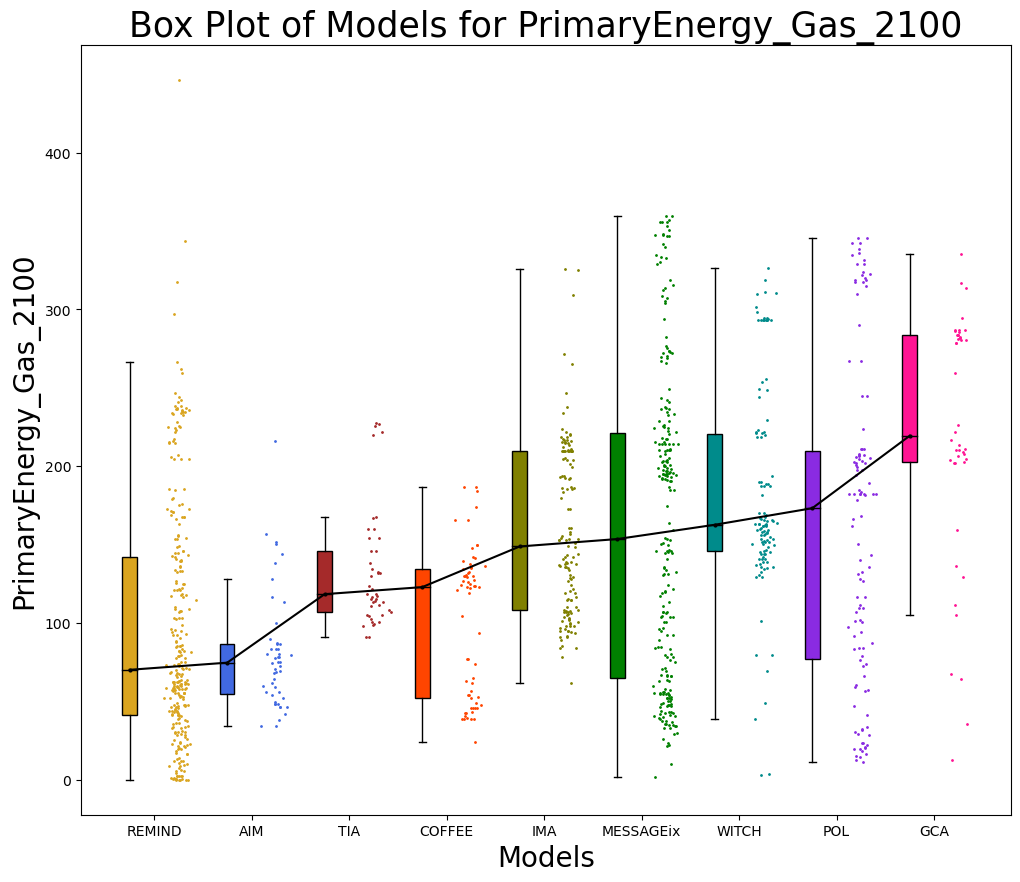

In [27]:
box_positions = np.arange(1, len(Model_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Model_names) + 1) + 0.25
#Calculate the median of each model's corresponding data
medians = [np.median(data) for data in Data_Values]

#Sort Model_names and Data_Values by median 
sorted_indices = np.argsort(medians)  #index in ascending order
sorted_Model_names = [Model_names[i] for i in sorted_indices]
sorted_Data_Values = [Data_Values[i] for i in sorted_indices]
sorted_medians = [np.median(data) for data in sorted_Data_Values]

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet','deeppink']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(sorted_Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(sorted_Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.plot(box_positions,sorted_medians,marker='o',color='black',markersize=2)
plt.xlabel('Models',fontsize=20)
plt.ylabel('PrimaryEnergy_Gas_2100',fontsize=20)
plt.title('Box Plot of Models for PrimaryEnergy_Gas_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Model_names) + 1), sorted_Model_names)
#plt.savefig('Box Plot of Models for PrimaryEnergy_Gas_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()